<a href="https://colab.research.google.com/github/technology1520/NLP/blob/main/NlpProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Frequency Distribution of Tokens:
<FreqDist with 10948 samples and 76660 outcomes>
Most Common Words:
[('Rs', 797), ('Harshad', 768), ('crore', 603), ('money', 548), ('market', 479), ('Bank', 461), ('RBI', 456), ('bank', 436), ('banks', 369), ('would', 357)]


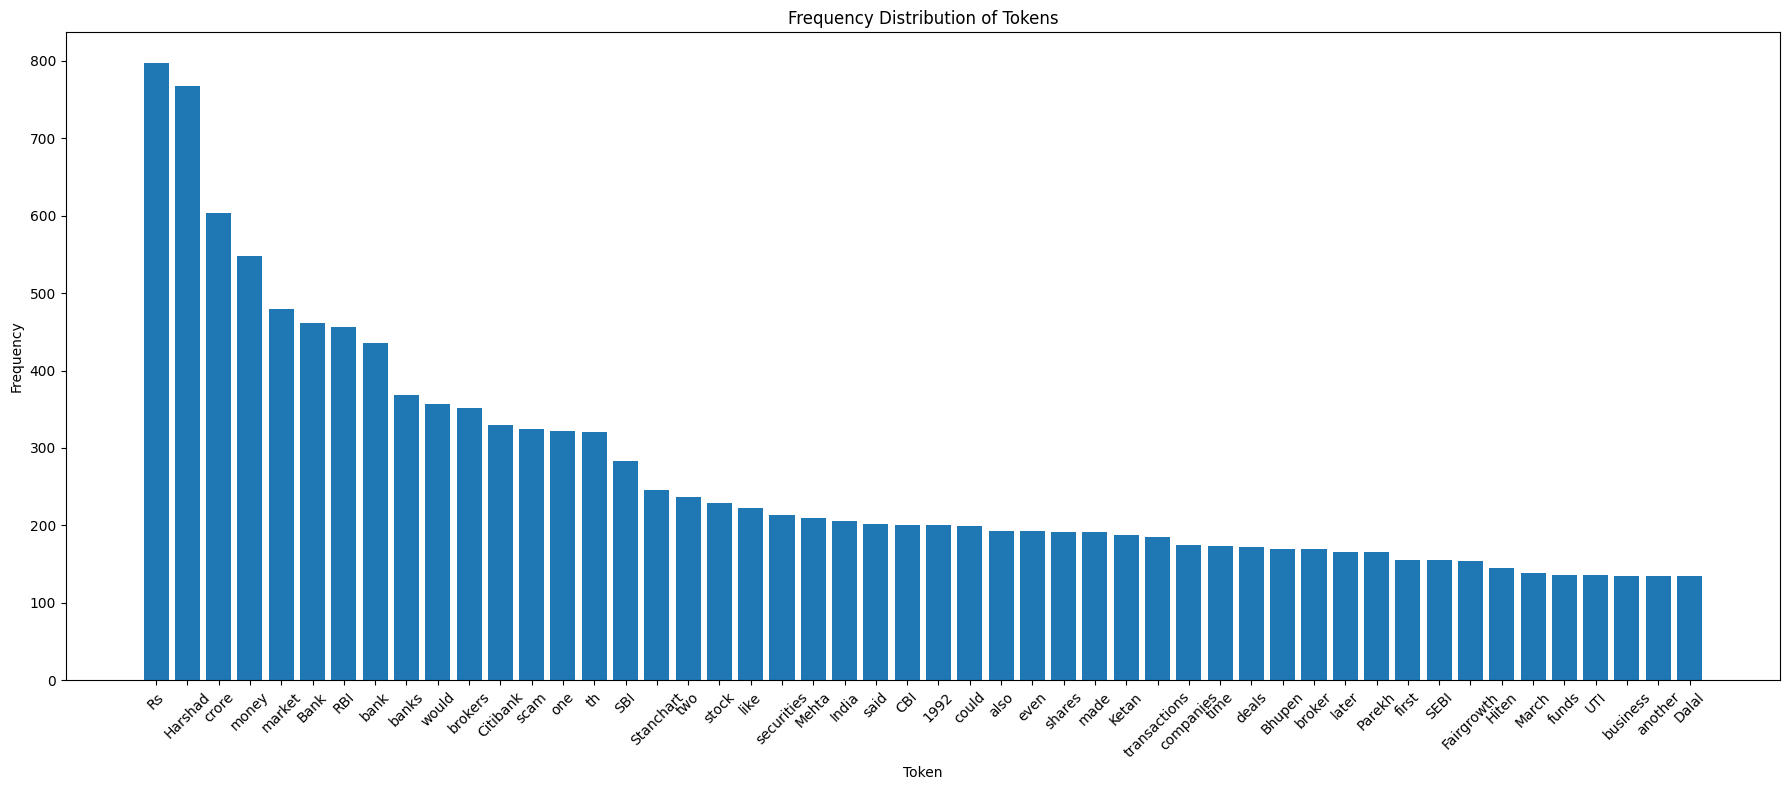

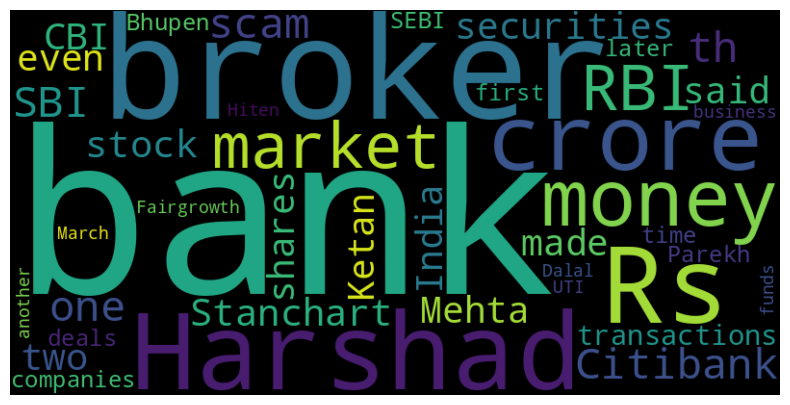

<FreqDist with 9 samples and 50 outcomes>


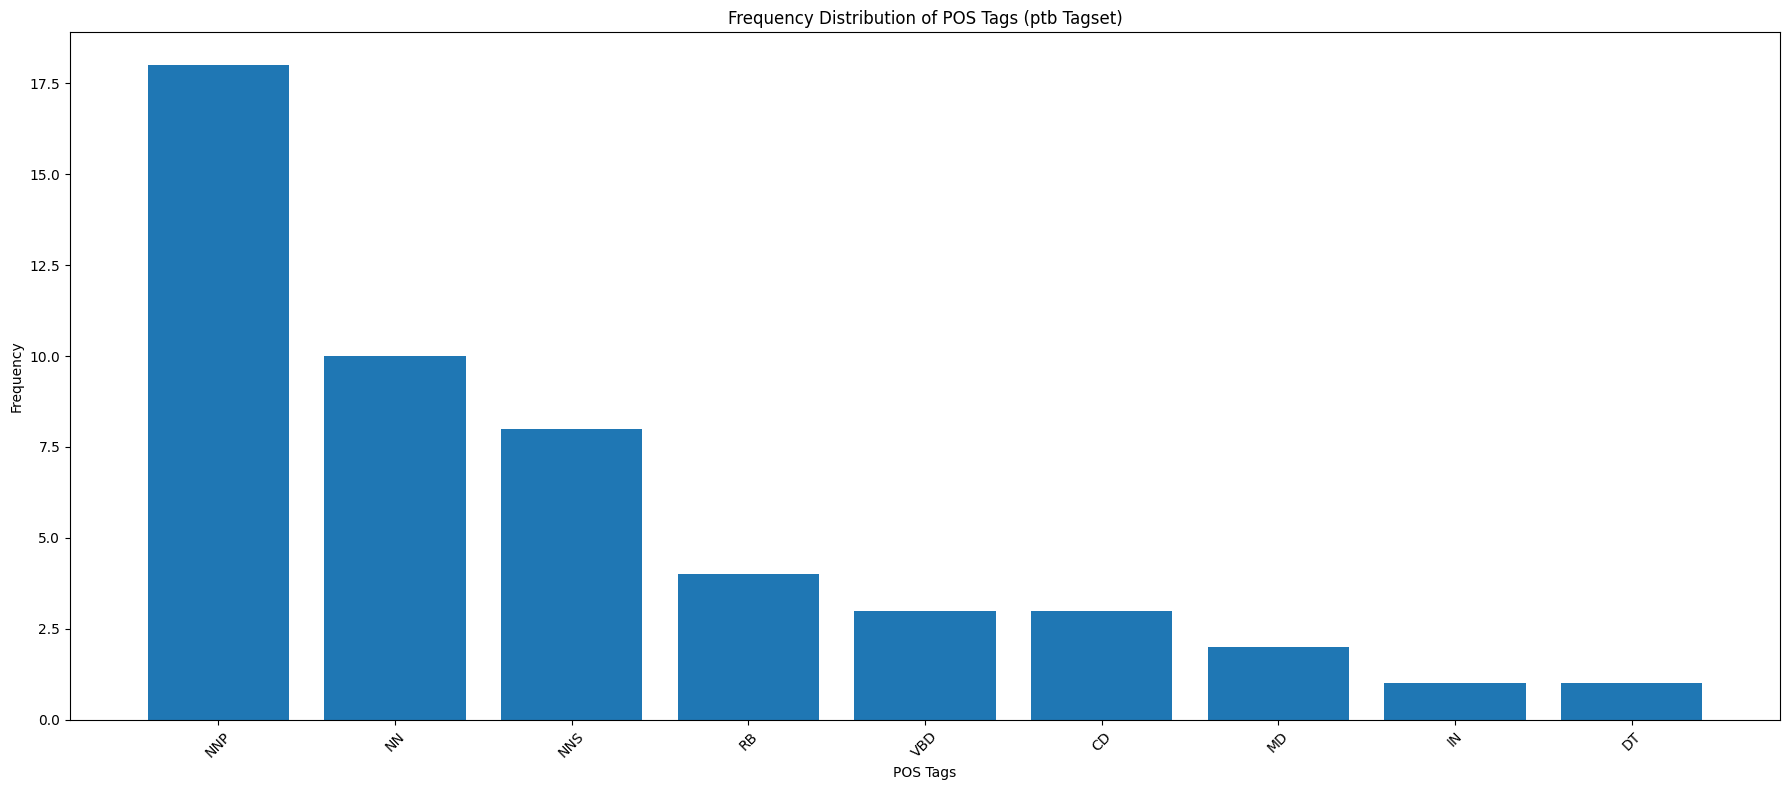

Fill in the blank:
The Scam Surfaces
Within a month, a
bank had gone under;
the CBI had been
called in to nab the
biggest player in the
stock market; and a
pillar of the financial
establishment had
died under
mysterious
circumstances. But all
this was just the
beginning.

It was early morning at Palani, a small, sleepy town 150 kilometres from
Coimbatore. Palani has had no claim to fame except for its temple atop a
hill. It has no industry, no major railhead, and it has never produced a
luminary. But on 12 th April 1992, Palani was to witness a historic event.
Only five persons could have sensed that. Harshad Mehta? He hadn’t a clue.
He hadn’t even heard of Palani.
At five on that Sunday morning, in one of the rooms of a small hotel
called Subam, RL Kamat, a deputy general manager, funds management
department of State Bank of India, was out of bed. Unassuming and honest,
Kamat had arrived from Bombay the previous evening. By six he had had a
bath, dressed up and stepped out. He was hea

In [1]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

with open('/content/theScam.txt', 'r', encoding='utf-8') as file:
    novel_text = file.read()

# Function to perform simple text preprocessing (remove chapter headings, images, tables, etc.)
def preprocess_text(text):
    text = re.sub(r'Chapter \d+', '', text)
    text = re.sub(r'\[Image: .*?\]', '', text)
    text = re.sub(r'\|', '', text)
    text=re.sub(r'[^\w\s]', ' ', text)
    return text

# Function to tokenize text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

text = preprocess_text(novel_text)
tokens = tokenize_and_remove_stopwords(text)

"""**Analysing the frequency distribution of tokens**"""

# Frequency distribution
fdist = FreqDist(tokens)

# Analysis part

print("Frequency Distribution of Tokens:")
print(fdist)

print("Most Common Words:")
print(fdist.most_common(10))

# Plotting the frequency distribution of 50 most common tokens

tokens, frequencies = zip(*fdist.most_common(50))

plt.figure(figsize=(18,8))
plt.bar(tokens, frequencies)

plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Tokens")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



"""**Creating the word cloud of token from txt file**"""

# Function to create a word cloud
def create_word_cloud(tokens):
    if tokens:
        wordcloud = WordCloud(width=800, height=400).generate(' '.join(tokens))
        wordcloud.to_file("wordcloud.png")

         # Displaying the WordCloud in the form of an image
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print("No tokens to create a word cloud from.")

# Creating a word cloud and display the image
create_word_cloud(tokens)

"""**Doing PoS Tagging using Penn Treebank tagset**"""

# Function to perform PoS tagging using the Penn Treebank tag set
def pos_tagging(text):
    tagged_text = nltk.pos_tag(text)
    pos_distribution = nltk.FreqDist(tag for (word, tag) in tagged_text)
    return pos_distribution

# Calling PoS tsagging function
pos_distribution = pos_tagging(tokens)
print(pos_distribution)

# extracting the PoS (Parts of Speech) tags and their frequencies from frequency distribution
PoS_Tags, frequencies = zip(*pos_distribution.most_common())


# Creating the bar plot
plt.figure(figsize=(18, 8))
plt.bar(PoS_Tags, frequencies)

plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of POS Tags (ptb Tagset)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""**Bi-Gram Probability table**"""

import pandas as pd
from nltk import bigrams
# Function to split text into chapters
def split_into_chapters(text):
    chapters = re.split(r'Chapter \d+', text)
    # Remove empty chapters
    chapters = [chapter.strip() for chapter in chapters if chapter.strip()]
    return chapters


# Function to create a bi-gram probability table
def create_bigram_probability_table(tokens):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = nltk.FreqDist(bigrams)
    bigram_prob = []

    for bigram, freq in bigram_freq.items():
        word1, word2 = bigram
        probability = freq / len(bigrams)
        bigram_prob.append((word1, word2, probability))

    return bigram_prob

# Finding the largest chapter
chapters = re.split(r'Chapter \d+', novel_text)
largest_chapter = max(chapters, key=len)

# Preprocessing the largest chapter
largest_chapter = preprocess_text(largest_chapter)

# Tokenizing the largest chapter without removing stop words
tokens1 = word_tokenize(largest_chapter)

# Creating a bigram probability table for the largest chapter
bigram_probability = create_bigram_probability_table(tokens1)
bigram_probability
pd.DataFrame(data = bigram_probability,columns=['Prev_word','Next_word','Prob']).sort_values(by=['Prob'], ascending=False)

"""**Playing Shannon Game**"""

"""**Playing Shannon Game**"""
import random

# Function to calculate accuracy by comparing user input with the original sentence
def calculate_accuracy(original_sentence, user_input):
    original_sentence_lower = original_sentence.lower()
    user_input_lower = user_input.lower()
    accuracy = original_sentence_lower.count(user_input_lower) / len(original_sentence_lower.split())
    return accuracy

# Function to play the Shannon game and evaluate accuracy
def play_shannon_game(bigram_probability, original_sentence):
    # Choosing a random bigram from the bigram probability table.
    bigram = random.choices(bigram_probability, weights=[prob for w1, w2, prob in bigram_probability])[0]
    prev_word, next_word, prob = bigram

    # Replacing the next word with a blank in the original sentence.
    question = original_sentence.replace(next_word, "______")

    # The answer is the next word in the bigram.
    answer = next_word

    # Printing the question to the console.
    print("Fill in the blank:")
    print(question)

    # Getting the user's input.
    user_input = input("Your answer: ")

    # Checking if the user's input is correct.
    if user_input.lower() == answer.lower():
        print("Correct!")
        # Calculating accuracy and displaying it
        accuracy = calculate_accuracy(original_sentence, user_input)
        print(f"Accuracy: {accuracy * 100:.2f}%")
    else:
        print(f"Incorrect. The correct answer is: {answer}")

# Finding chapters other than Chapter C
chapters = split_into_chapters(novel_text)
valid_chapters = [chapter for chapter in chapters if not re.match(r'Chapter C', chapter)]

if valid_chapters:
    # Choosing a random chapter
    random_chapter = random.choice(valid_chapters)
    # Tokenizing the chapter without removing stop words
    chapter_tokens = word_tokenize(random_chapter)

    # Capturing the original sentence before playing the game
    original_sentence = random_chapter

    # Playing the Shannon game and evaluating accuracy
    play_shannon_game(bigram_probability, original_sentence)
else:
    print("No valid chapters found (excluding Chapter C).")